Porosity ε 1 = 0.384:
  Particle diameter from viscous term (dp_1): 0.002226 m
  Particle diameter from inertial term (dp_2): 0.015765 m

Porosity ε 2 = 0.462:
  Particle diameter from viscous term (dp_1): 0.001473 m
  Particle diameter from inertial term (dp_2): 0.007906 m



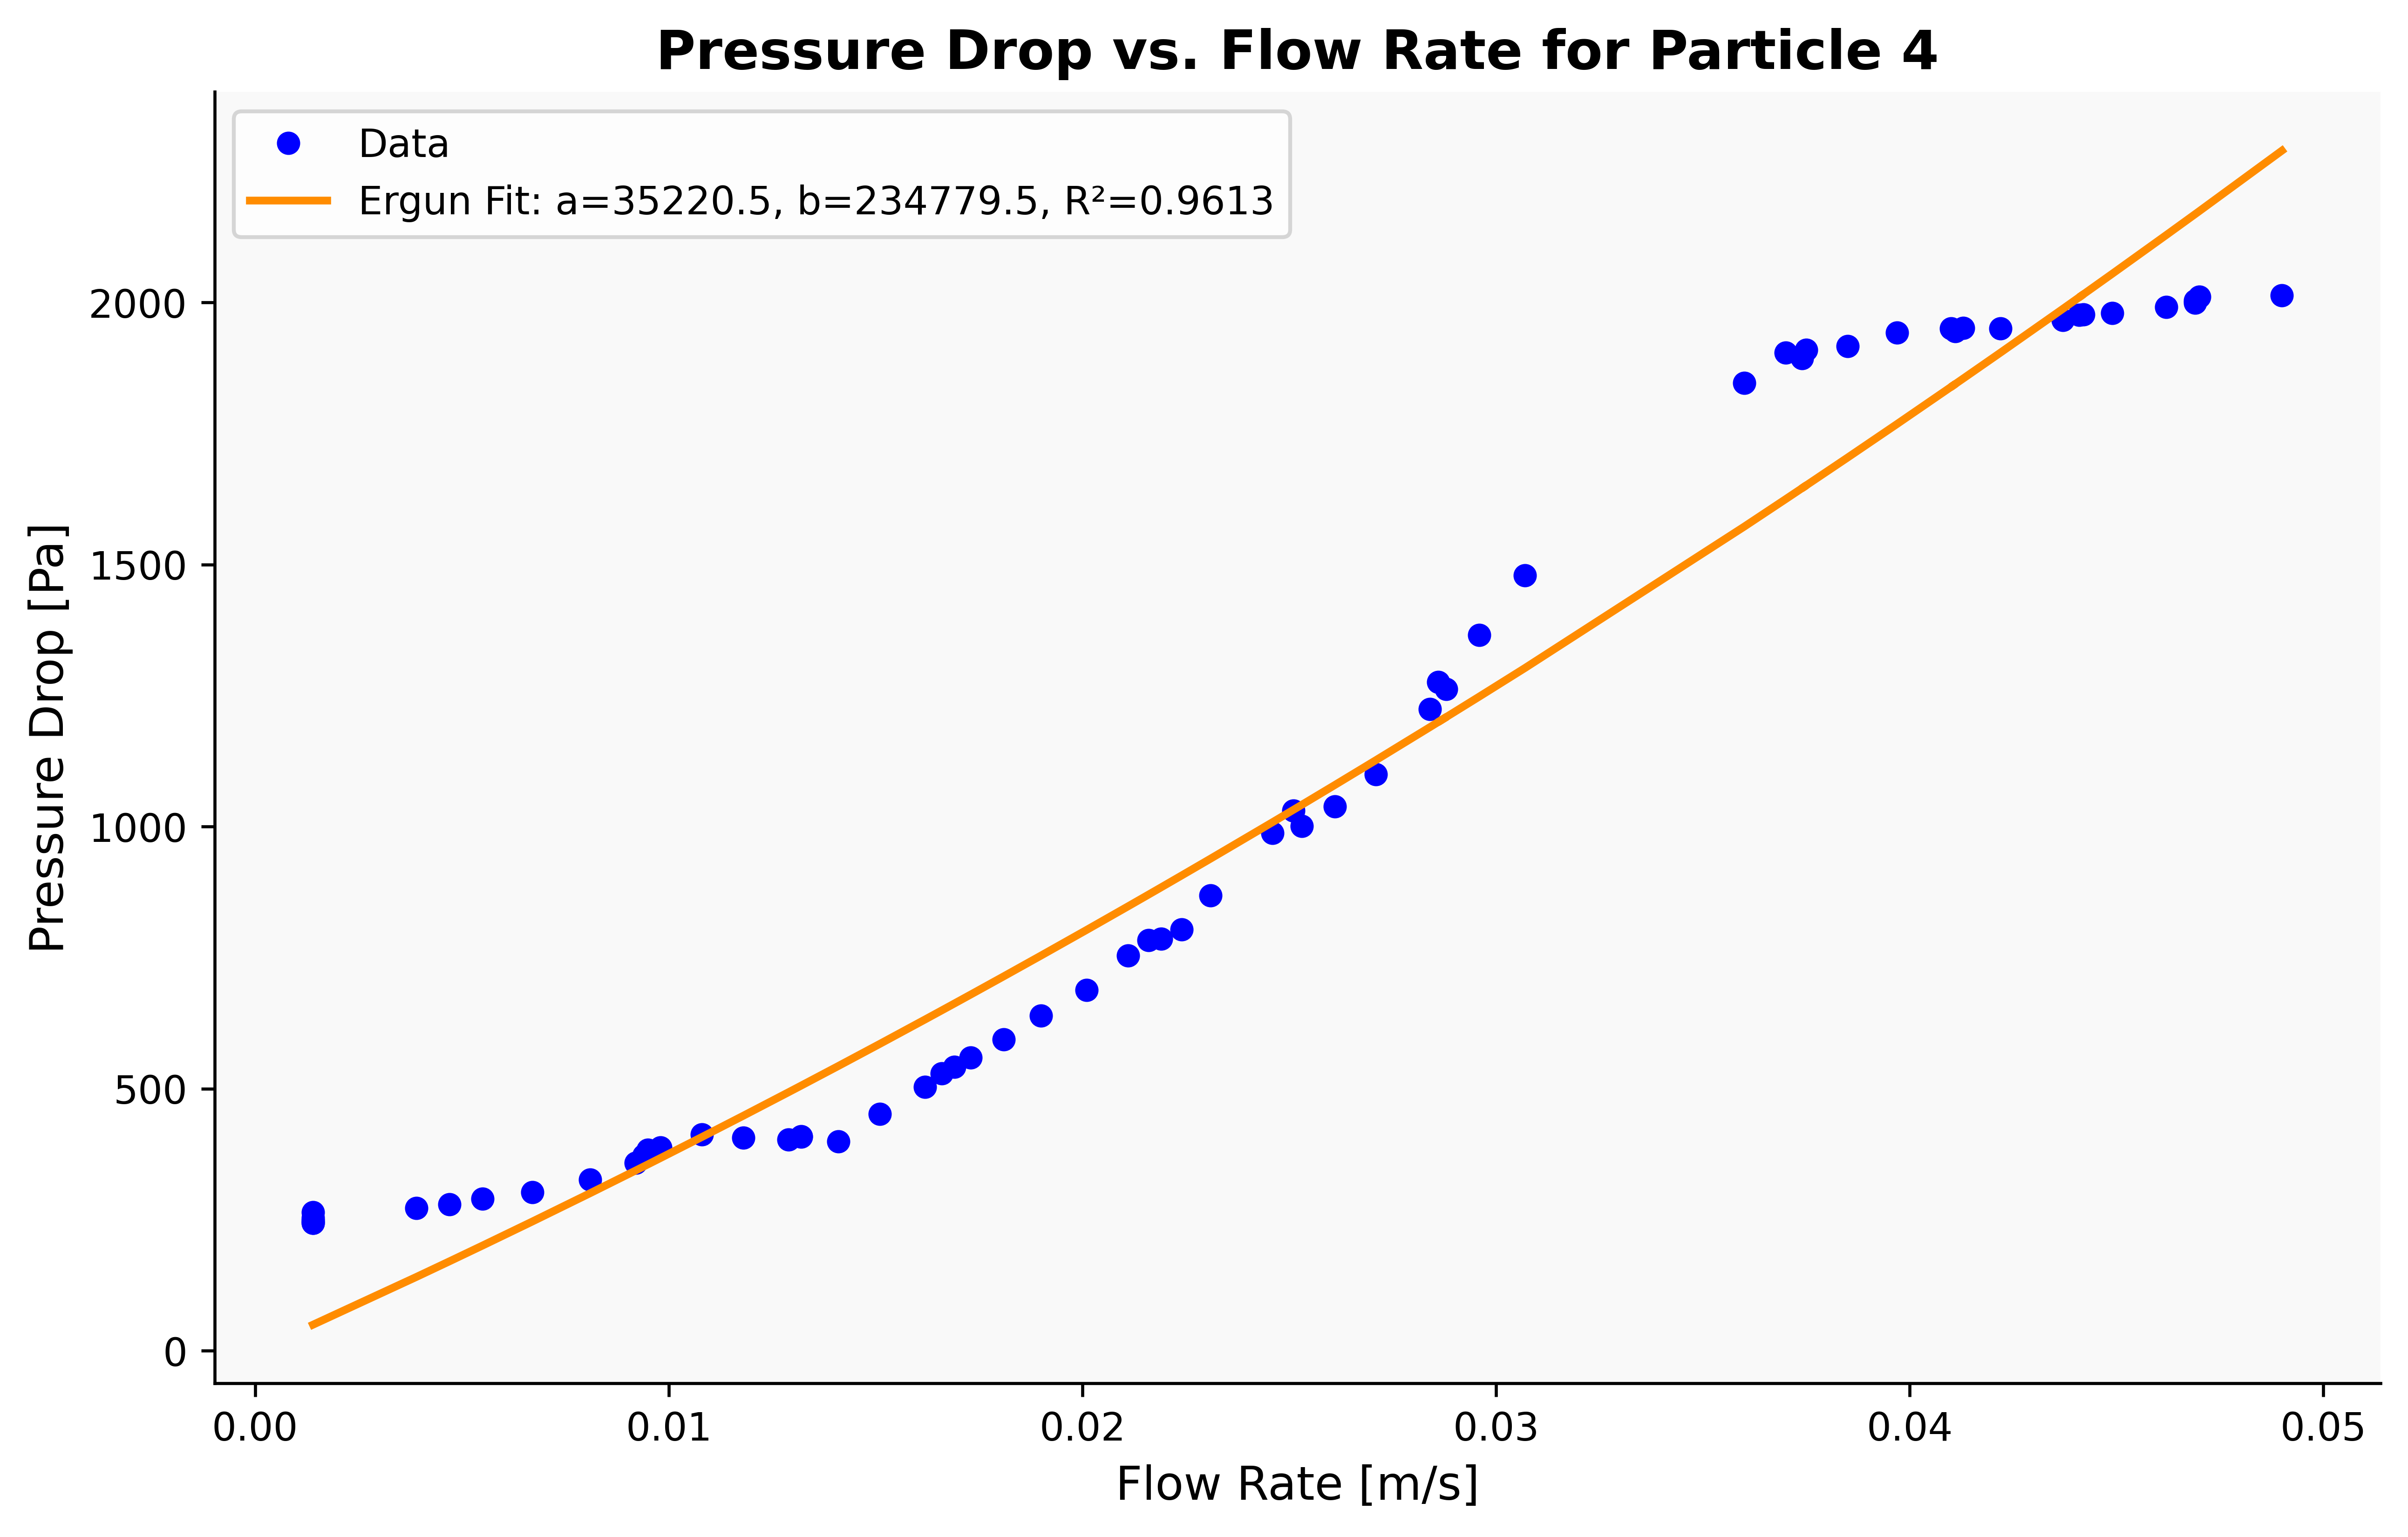

Plot saved successfully at: /Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Graphs/Fitting_Particle 4.png


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

# File paths
file_path = "/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Data.xlsx"
save_folder = "/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Graphs"
sheet_name = "no.4"
label = "Particle 4"

# Ensure save folder exists
os.makedirs(save_folder, exist_ok=True)

# Constants
mu = 0.00089  # Fluid viscosity (Pa·s) 
rho = 997  # Fluid density (kg/m³) 
L = 0.195  # Packed bed height (m)

# Two different porosity values
epsilon_1 = 0.384  
epsilon_2 = 0.462  

# Fitting Ergun equation function
def ergun_eq(flow_rate, a, b):
    return a * flow_rate + b * flow_rate**2

# Read the data
df = pd.read_excel(file_path, sheet_name=sheet_name)
flow_rate = df.iloc[:, 0]  # First column (Flow Rate)
pressure_loss = df.iloc[:, 1]  # Second column (Pressure Loss)

# Fit Ergun's equation
popt, _ = curve_fit(ergun_eq, flow_rate, pressure_loss)
a_fit, b_fit = popt

# Function to calculate particle diameter for a given epsilon
def calculate_dp(epsilon):
    dp_1 = np.sqrt((150 * (1 - epsilon) ** 2 * mu * L) / (epsilon ** 3 * a_fit))  # From viscous term
    dp_2 = (1.75 * (1 - epsilon) * rho * L) / (epsilon ** 3 * b_fit)  # From inertial term
    return dp_1, dp_2

# Calculate dp for both porosity values
dp_1_eps1, dp_2_eps1 = calculate_dp(epsilon_1)
dp_1_eps2, dp_2_eps2 = calculate_dp(epsilon_2)

# Calculate R-squared value
fitted_pressure_loss = ergun_eq(flow_rate, *popt)
residuals = pressure_loss - fitted_pressure_loss
ss_res = np.sum(residuals**2)
ss_tot = np.sum((pressure_loss - np.mean(pressure_loss))**2)
r_squared = 1 - (ss_res / ss_tot)

# Print the calculated particle diameters for both porosities
print(f"Porosity ε 1 = {epsilon_1}:")
print(f"  Particle diameter from viscous term (dp_1): {dp_1_eps1:.6f} m")
print(f"  Particle diameter from inertial term (dp_2): {dp_2_eps1:.6f} m\n")

print(f"Porosity ε 2 = {epsilon_2}:")
print(f"  Particle diameter from viscous term (dp_1): {dp_1_eps2:.6f} m")
print(f"  Particle diameter from inertial term (dp_2): {dp_2_eps2:.6f} m\n")

# Create a plot
plt.figure(figsize=(10, 6), dpi=600)  # High-quality image
plt.plot(flow_rate, pressure_loss, 'o', color='b', markersize=5, label="Data")
plt.plot(flow_rate, fitted_pressure_loss, '-', color='darkorange', linewidth=2, 
         label=f"Ergun Fit: a={a_fit:.1f}, b={b_fit:.1f}, R²={r_squared:.4f}")

# Labels and title
plt.xlabel("Flow Rate [m/s]", fontsize=12)
plt.ylabel("Pressure Drop [Pa]", fontsize=12)
plt.title(f"Pressure Drop vs. Flow Rate for {label}", fontsize=14, weight='bold')

# Customize grid and styling
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_facecolor('#f9f9f9')  # Subtle background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
plt.legend(fontsize=10)
plt.grid(False)

# Save the figure
save_path = os.path.join(save_folder, f"Fitting_{label}.png")
plt.savefig(save_path, format='png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved successfully at: {save_path}")


Try

Porosity ε 1 = 0.395:
  Particle diameter from viscous term (dp_1): 0.001586 m
  Particle diameter from inertial term (dp_2): -0.010172 m

Porosity ε 2 = 0.464:
  Particle diameter from viscous term (dp_1): 0.001104 m
  Particle diameter from inertial term (dp_2): -0.005560 m



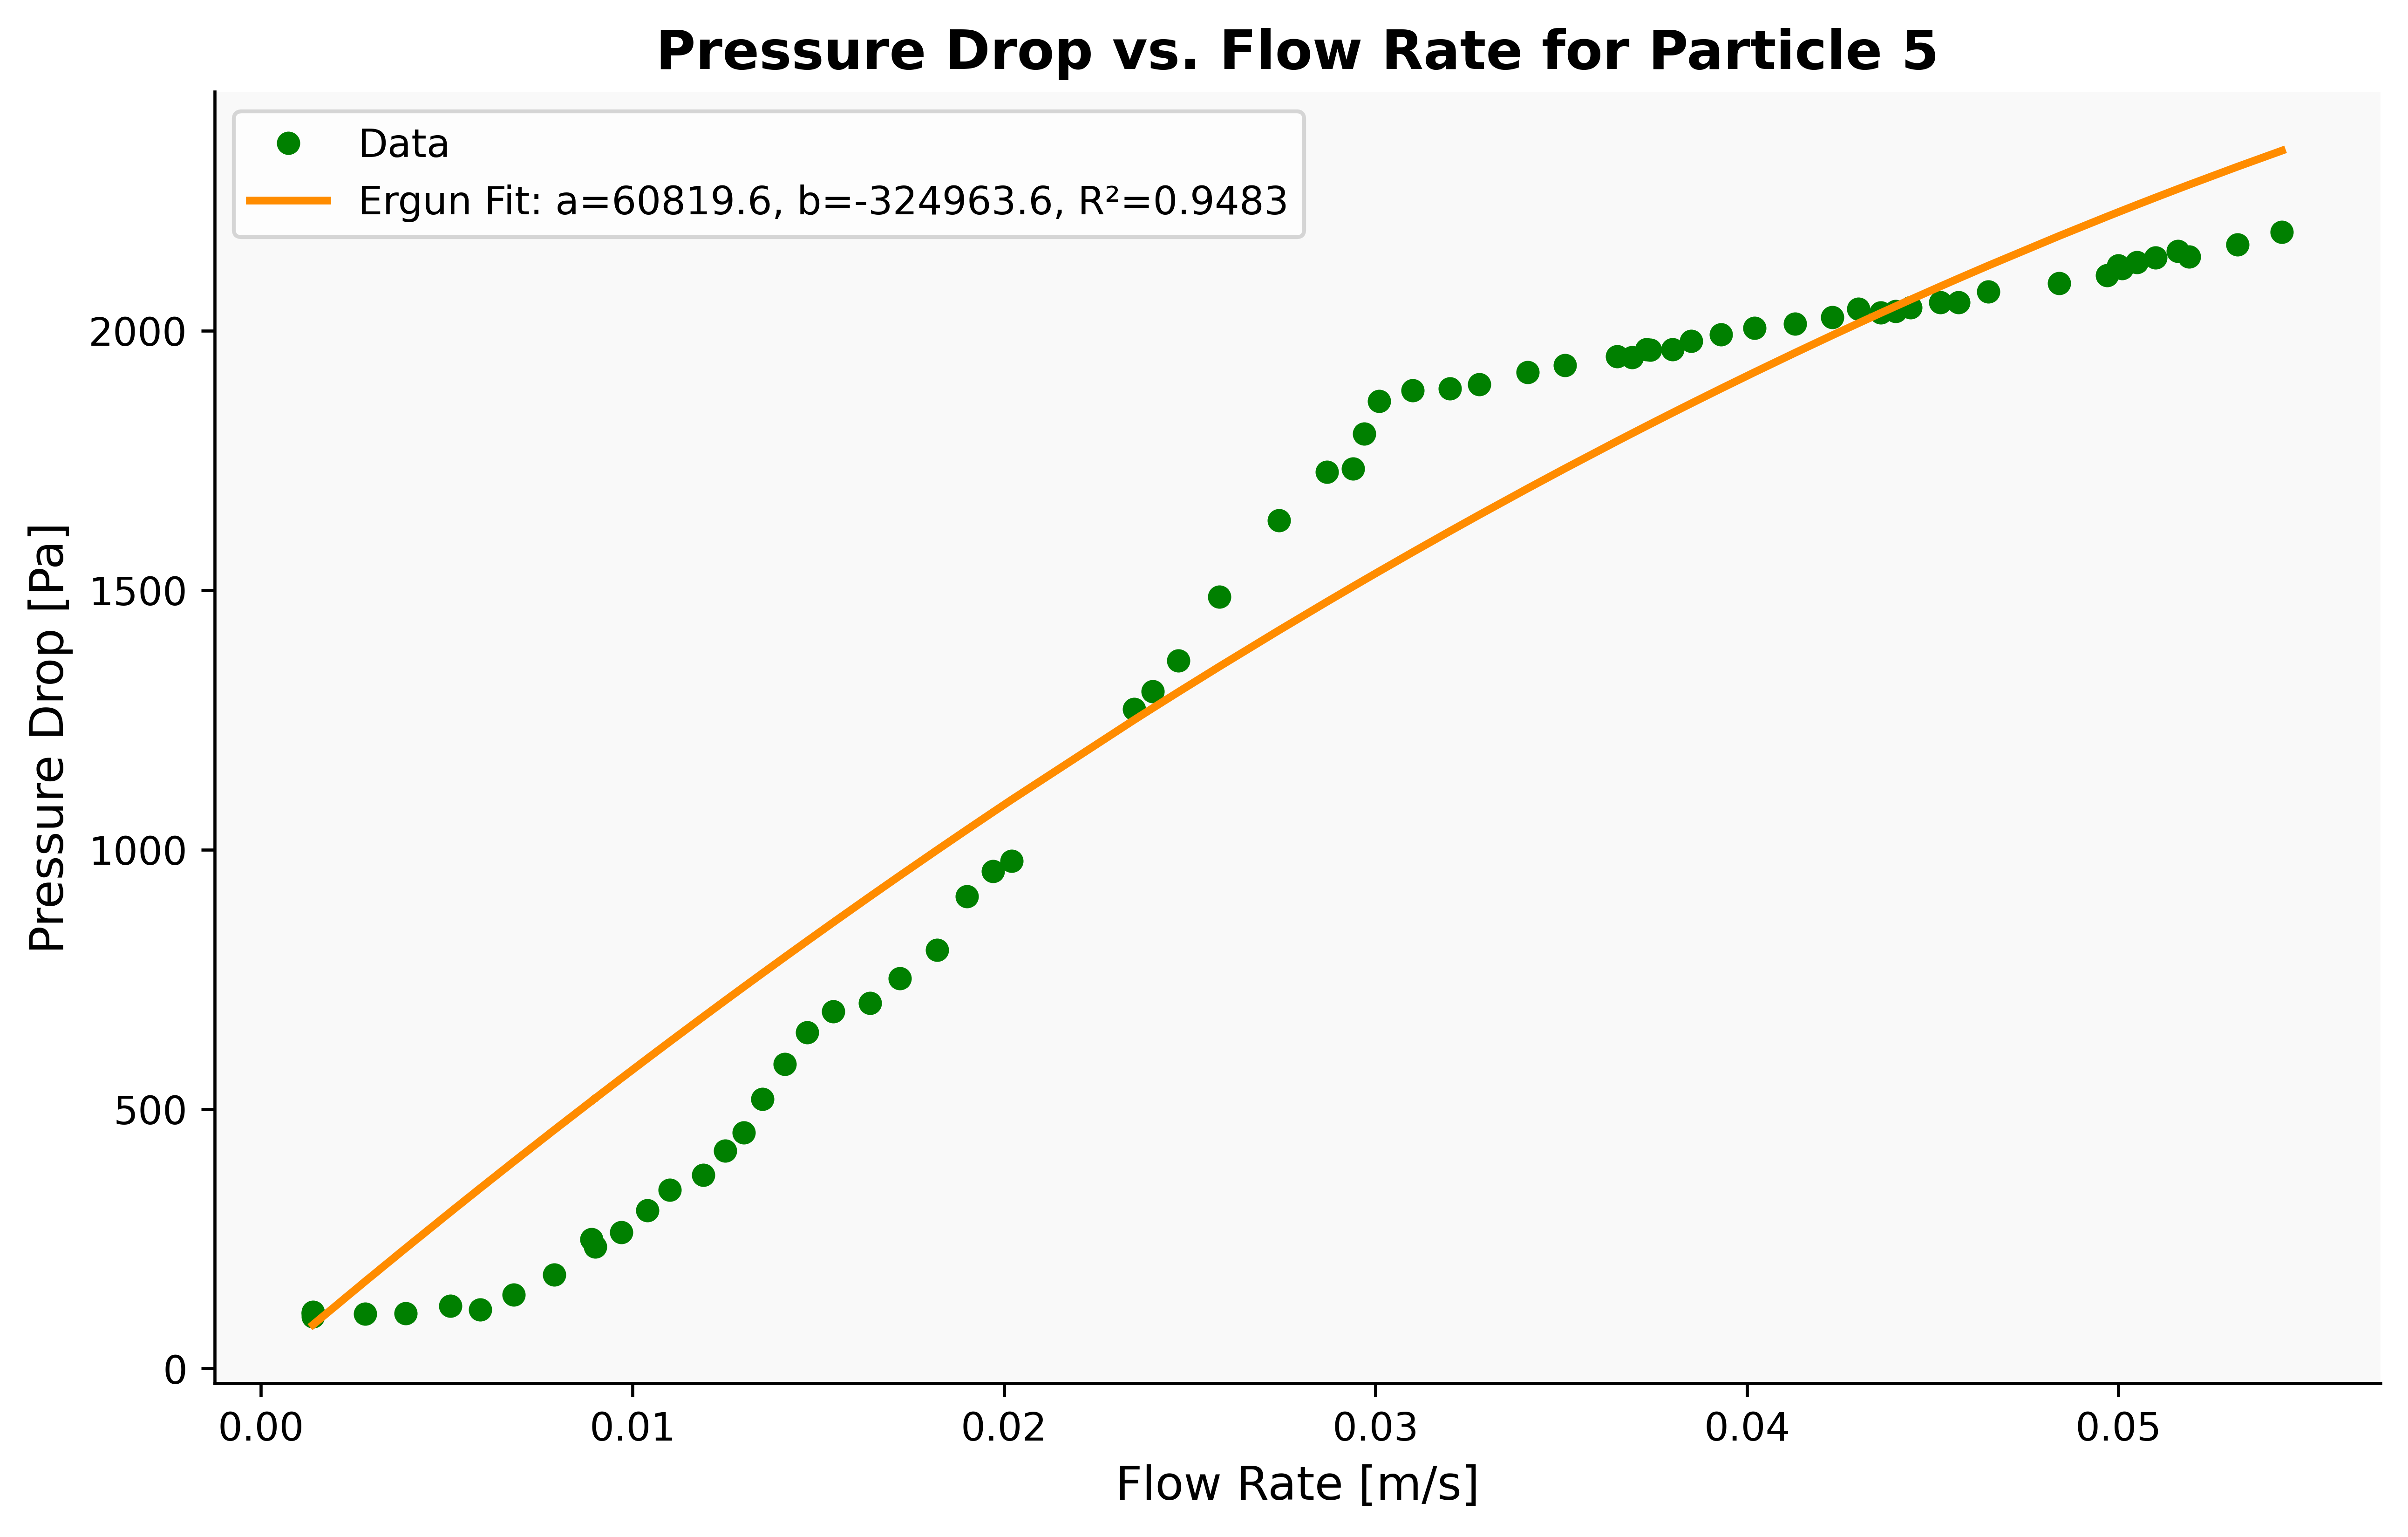

Plot saved successfully at: /Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Graphs/Fitting_Particle 5.png


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

# File paths
file_path = "/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Data.xlsx"
save_folder = "/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Graphs"
sheet_name = "no.5"
label = "Particle 5"

# Ensure save folder exists
os.makedirs(save_folder, exist_ok=True)

# Constants
mu = 0.00089  # Fluid viscosity (Pa·s) 
rho = 997  # Fluid density (kg/m³) 
L = 0.193  # Packed bed height (m)

# Two different porosity values
epsilon_1 = 0.395  
epsilon_2 = 0.464  

# Fitting Ergun equation function
def ergun_eq(flow_rate, a, b):
    return a * flow_rate + b * flow_rate**2

# Read the data
df = pd.read_excel(file_path, sheet_name=sheet_name)
flow_rate = df.iloc[:, 0]  # First column (Flow Rate)
pressure_loss = df.iloc[:, 1]  # Second column (Pressure Loss)

# Fit Ergun's equation
popt, _ = curve_fit(ergun_eq, flow_rate, pressure_loss)
a_fit, b_fit = popt

# Function to calculate particle diameter for a given epsilon
def calculate_dp(epsilon):
    dp_1 = np.sqrt((150 * (1 - epsilon) ** 2 * mu * L) / (epsilon ** 3 * a_fit))  # From viscous term
    dp_2 = (1.75 * (1 - epsilon) * rho * L) / (epsilon ** 3 * b_fit)  # From inertial term
    return dp_1, dp_2

# Calculate dp for both porosity values
dp_1_eps1, dp_2_eps1 = calculate_dp(epsilon_1)
dp_1_eps2, dp_2_eps2 = calculate_dp(epsilon_2)

# Calculate R-squared value
fitted_pressure_loss = ergun_eq(flow_rate, *popt)
residuals = pressure_loss - fitted_pressure_loss
ss_res = np.sum(residuals**2)
ss_tot = np.sum((pressure_loss - np.mean(pressure_loss))**2)
r_squared = 1 - (ss_res / ss_tot)

# Print the calculated particle diameters for both porosities
print(f"Porosity ε 1 = {epsilon_1}:")
print(f"  Particle diameter from viscous term (dp_1): {dp_1_eps1:.6f} m")
print(f"  Particle diameter from inertial term (dp_2): {dp_2_eps1:.6f} m\n")

print(f"Porosity ε 2 = {epsilon_2}:")
print(f"  Particle diameter from viscous term (dp_1): {dp_1_eps2:.6f} m")
print(f"  Particle diameter from inertial term (dp_2): {dp_2_eps2:.6f} m\n")

# Create a plot
plt.figure(figsize=(10, 6), dpi=600)  # High-quality image
plt.plot(flow_rate, pressure_loss, 'o', color='g', markersize=5, label="Data")
plt.plot(flow_rate, fitted_pressure_loss, '-', color='darkorange', linewidth=2, 
         label=f"Ergun Fit: a={a_fit:.1f}, b={b_fit:.1f}, R²={r_squared:.4f}")

# Labels and title
plt.xlabel("Flow Rate [m/s]", fontsize=12)
plt.ylabel("Pressure Drop [Pa]", fontsize=12)
plt.title(f"Pressure Drop vs. Flow Rate for {label}", fontsize=14, weight='bold')

# Customize grid and styling
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_facecolor('#f9f9f9')  # Subtle background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
plt.legend(fontsize=10)
plt.grid(False)

# Save the figure
save_path = os.path.join(save_folder, f"Fitting_{label}.png")
plt.savefig(save_path, format='png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved successfully at: {save_path}")


Porosity ε 1 = 0.396:
  Particle diameter from viscous term (dp_1): 0.002154 m
  Particle diameter from inertial term (dp_2): 0.015525 m

Porosity ε 2 = 0.435:
  Particle diameter from viscous term (dp_1): 0.001750 m
  Particle diameter from inertial term (dp_2): 0.010956 m



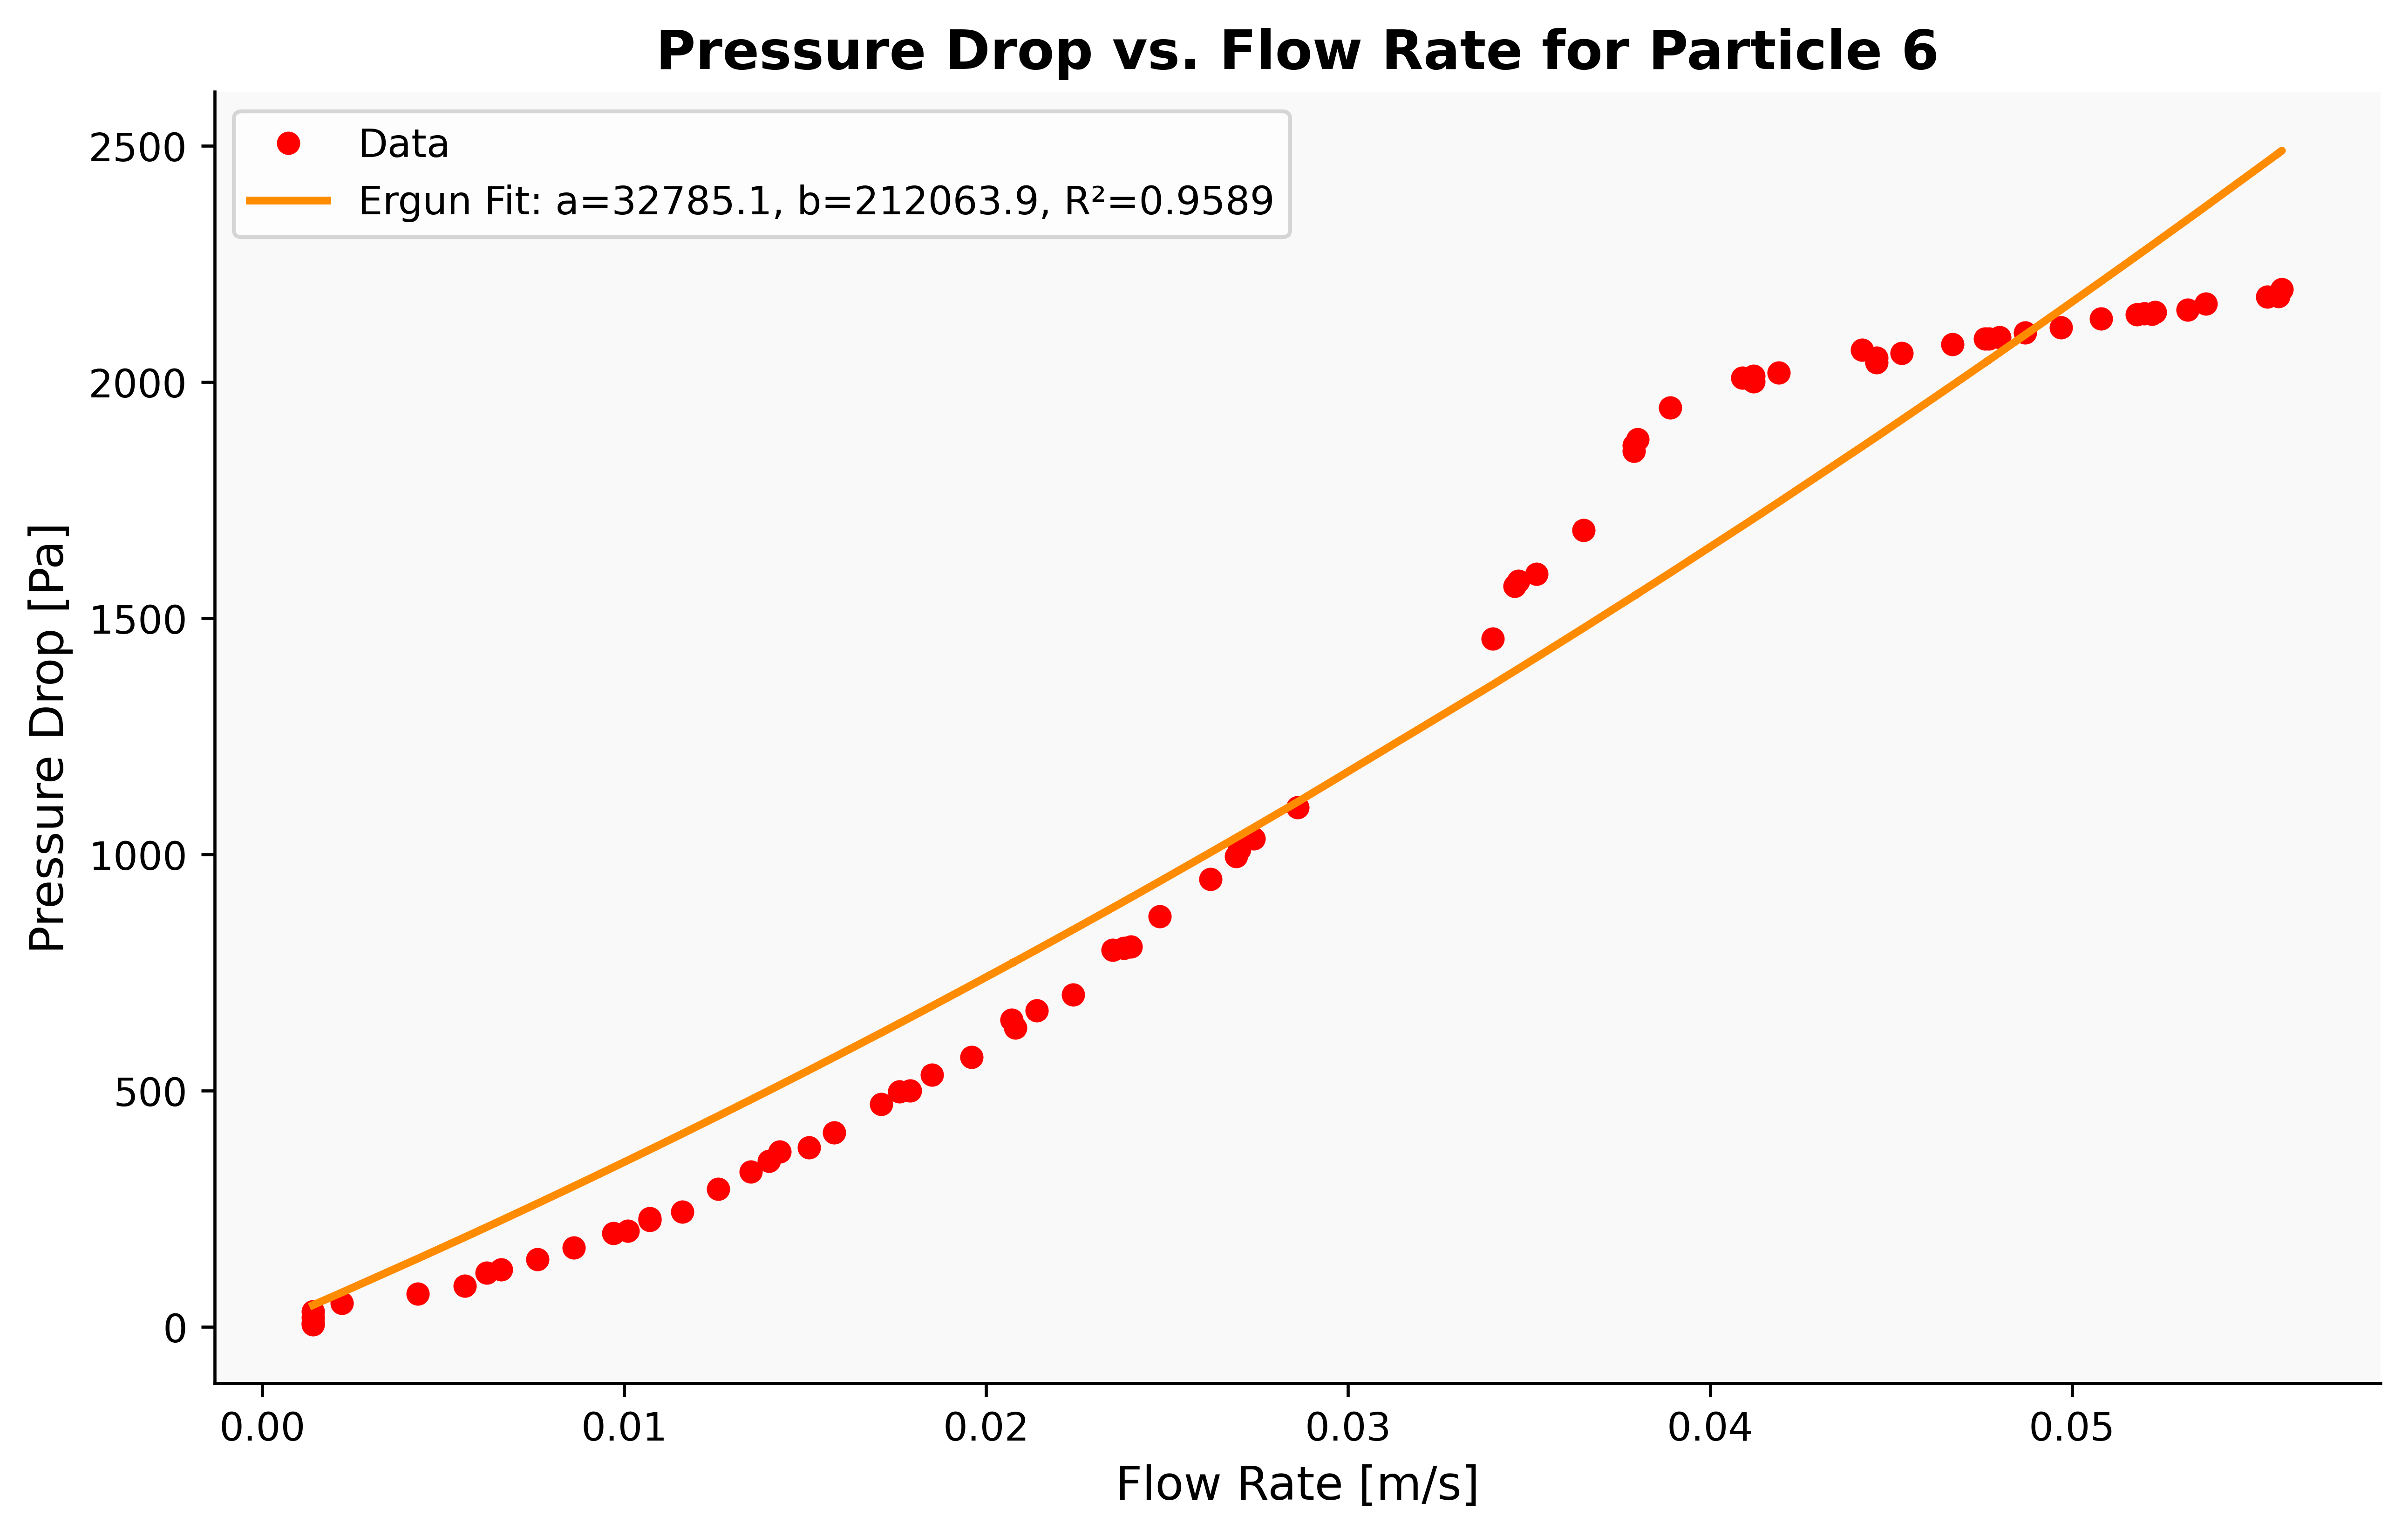

Plot saved successfully at: /Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Graphs/Fitting_Particle 6.png


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

# File paths
file_path = "/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Data.xlsx"
save_folder = "/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Graphs"
sheet_name = "no.6"
label = "Particle 6"

# Ensure save folder exists
os.makedirs(save_folder, exist_ok=True)

# Constants
mu = 0.00089  # Fluid viscosity (Pa·s) 
rho = 997  # Fluid density (kg/m³) 
L = 0.194  # Packed bed height (m)

# Two different porosity values
epsilon_1 = 0.396  
epsilon_2 = 0.435  

# Fitting Ergun equation function
def ergun_eq(flow_rate, a, b):
    return a * flow_rate + b * flow_rate**2

# Read the data
df = pd.read_excel(file_path, sheet_name=sheet_name)
flow_rate = df.iloc[:, 0]  # First column (Flow Rate)
pressure_loss = df.iloc[:, 1]  # Second column (Pressure Loss)

# Fit Ergun's equation
popt, _ = curve_fit(ergun_eq, flow_rate, pressure_loss)
a_fit, b_fit = popt

# Function to calculate particle diameter for a given epsilon
def calculate_dp(epsilon):
    dp_1 = np.sqrt((150 * (1 - epsilon) ** 2 * mu * L) / (epsilon ** 3 * a_fit))  # From viscous term
    dp_2 = (1.75 * (1 - epsilon) * rho * L) / (epsilon ** 3 * b_fit)  # From inertial term
    return dp_1, dp_2

# Calculate dp for both porosity values
dp_1_eps1, dp_2_eps1 = calculate_dp(epsilon_1)
dp_1_eps2, dp_2_eps2 = calculate_dp(epsilon_2)

# Calculate R-squared value
fitted_pressure_loss = ergun_eq(flow_rate, *popt)
residuals = pressure_loss - fitted_pressure_loss
ss_res = np.sum(residuals**2)
ss_tot = np.sum((pressure_loss - np.mean(pressure_loss))**2)
r_squared = 1 - (ss_res / ss_tot)

# Print the calculated particle diameters for both porosities
print(f"Porosity ε 1 = {epsilon_1}:")
print(f"  Particle diameter from viscous term (dp_1): {dp_1_eps1:.6f} m")
print(f"  Particle diameter from inertial term (dp_2): {dp_2_eps1:.6f} m\n")

print(f"Porosity ε 2 = {epsilon_2}:")
print(f"  Particle diameter from viscous term (dp_1): {dp_1_eps2:.6f} m")
print(f"  Particle diameter from inertial term (dp_2): {dp_2_eps2:.6f} m\n")

# Create a plot
plt.figure(figsize=(10, 6), dpi=600)  # High-quality image
plt.plot(flow_rate, pressure_loss, 'o', color='r', markersize=5, label="Data")
plt.plot(flow_rate, fitted_pressure_loss, '-', color='darkorange', linewidth=2, 
         label=f"Ergun Fit: a={a_fit:.1f}, b={b_fit:.1f}, R²={r_squared:.4f}")

# Labels and title
plt.xlabel("Flow Rate [m/s]", fontsize=12)
plt.ylabel("Pressure Drop [Pa]", fontsize=12)
plt.title(f"Pressure Drop vs. Flow Rate for {label}", fontsize=14, weight='bold')

# Customize grid and styling
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_facecolor('#f9f9f9')  # Subtle background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
plt.legend(fontsize=10)
plt.grid(False)

# Save the figure
save_path = os.path.join(save_folder, f"Fitting_{label}.png")
plt.savefig(save_path, format='png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved successfully at: {save_path}")


Porosity ε 1 = 0.393:
  Particle diameter from viscous term (dp_1): 0.002603 m
  Particle diameter from inertial term (dp_2): 0.014145 m

Porosity ε 2 = 0.442:
  Particle diameter from viscous term (dp_1): 0.002006 m
  Particle diameter from inertial term (dp_2): 0.009141 m



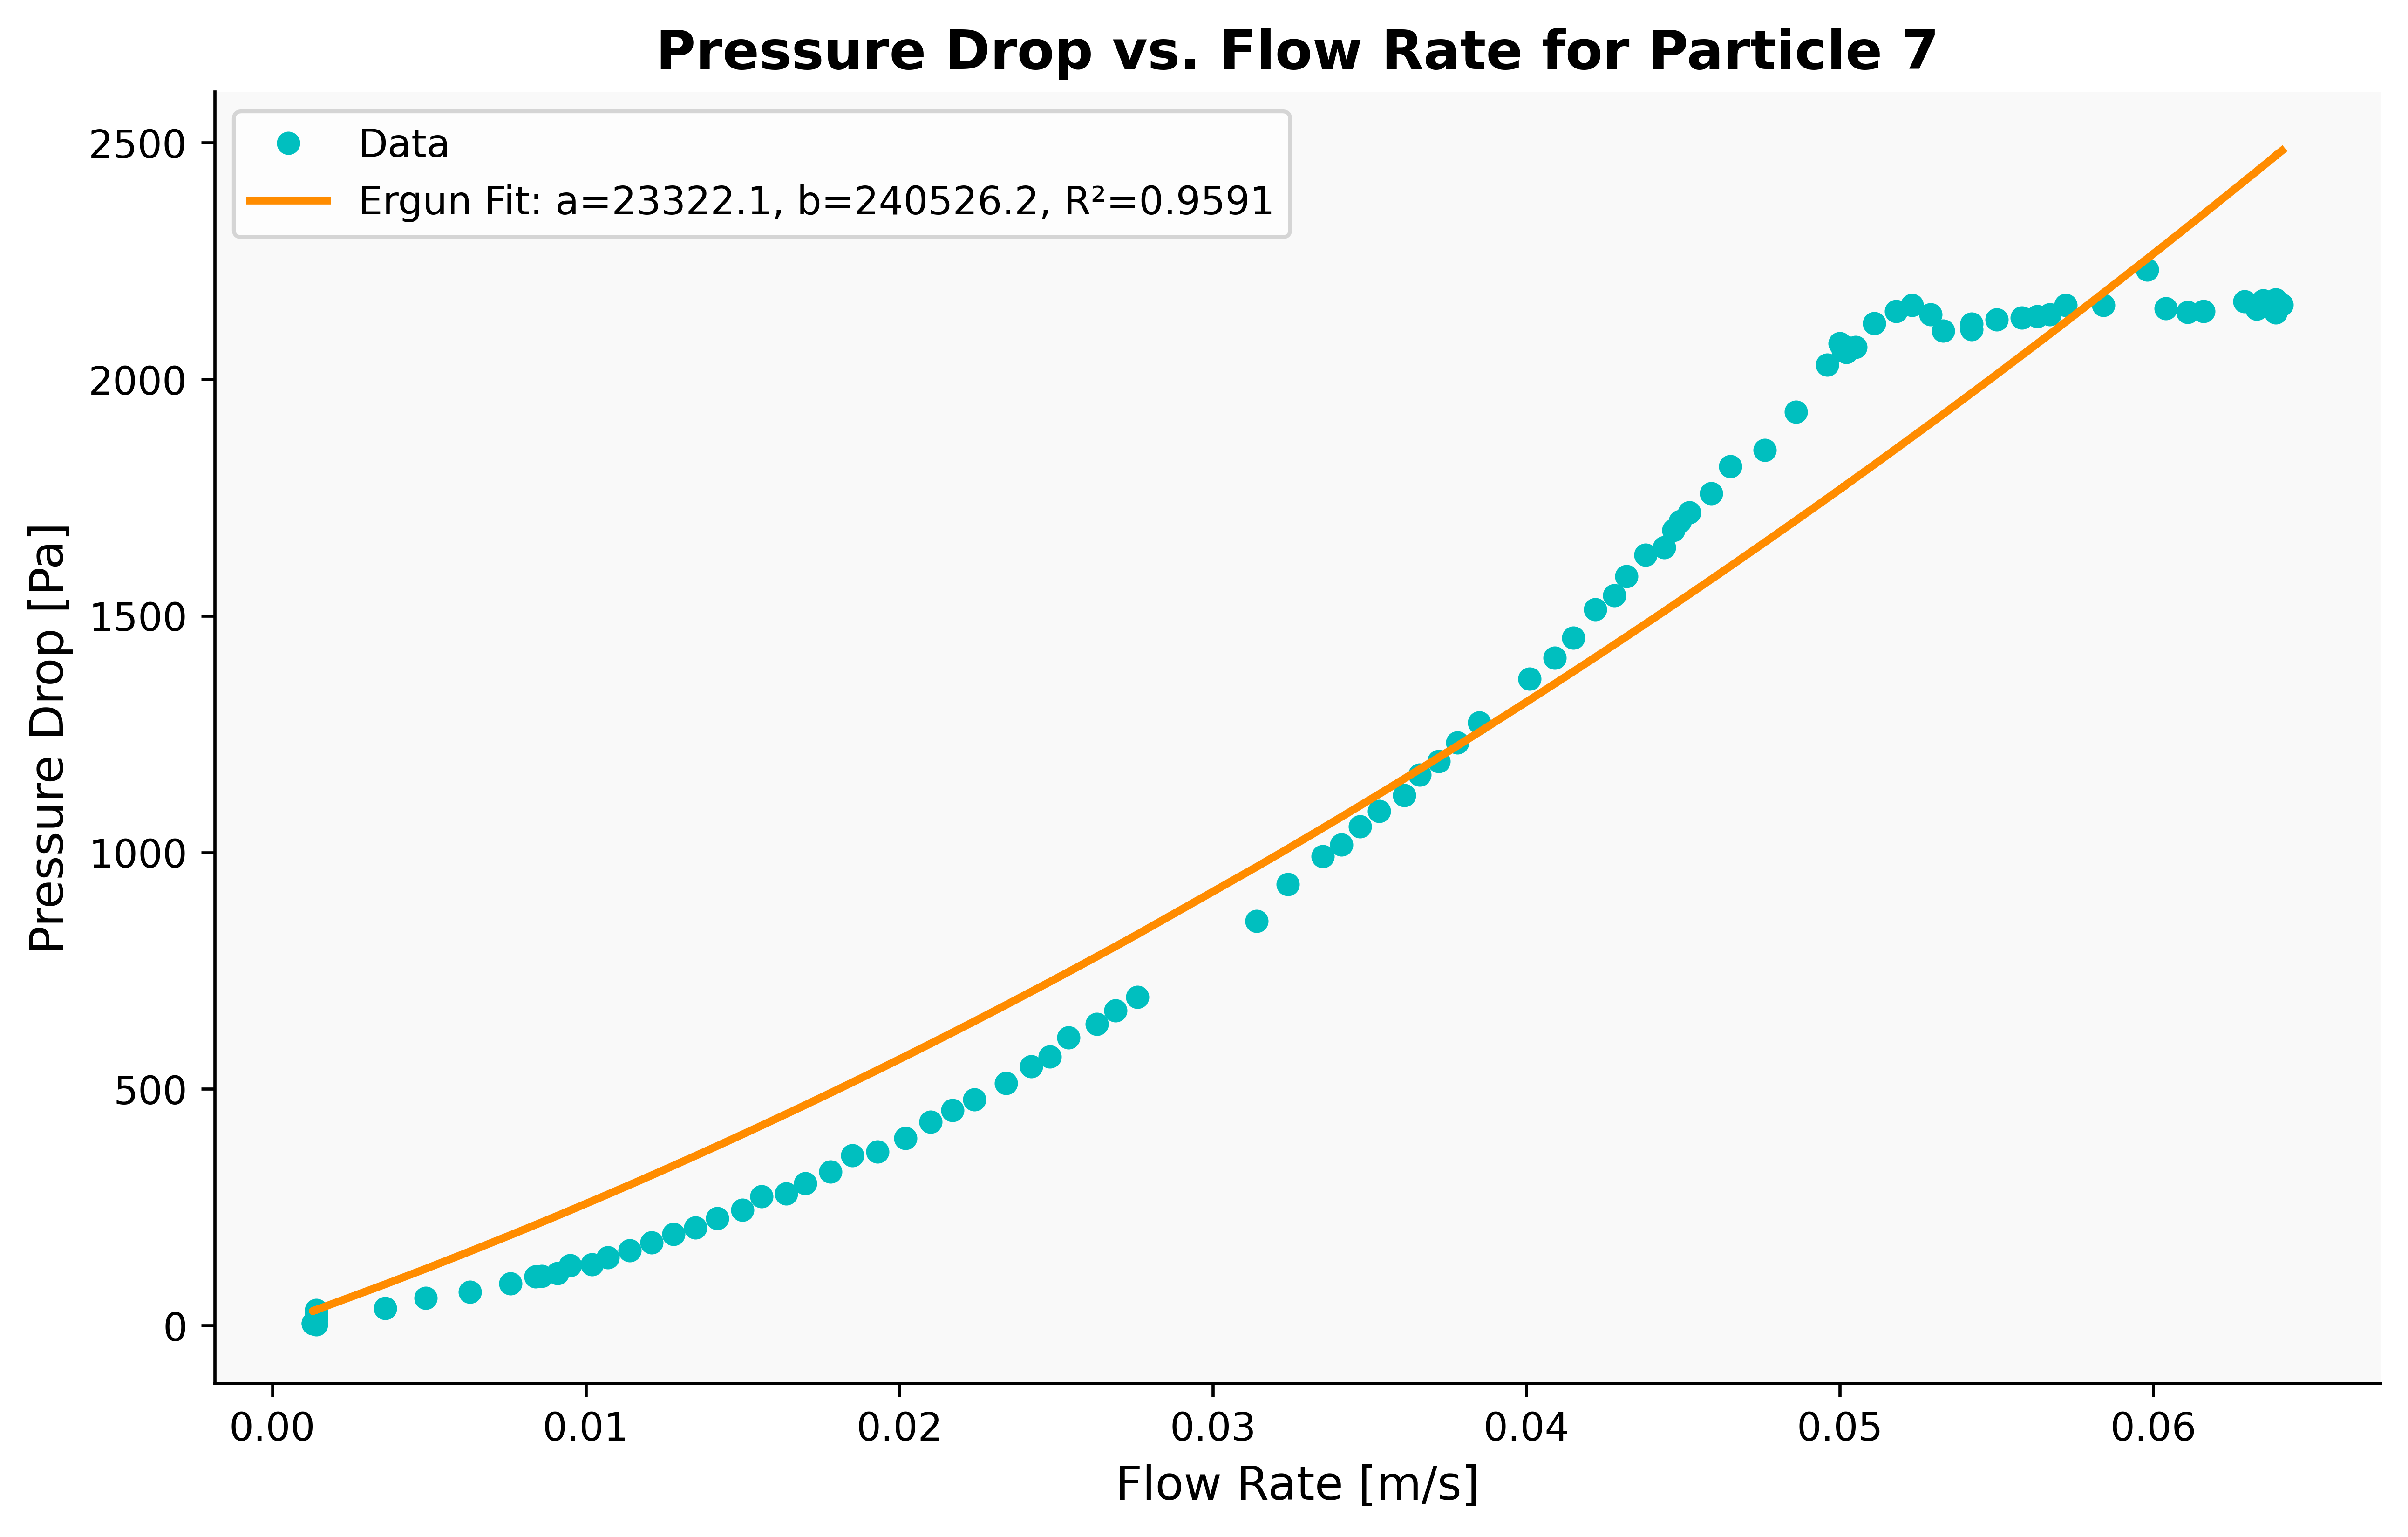

Plot saved successfully at: /Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Graphs/Fitting_Particle 7.png


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

# File paths
file_path = "/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Data.xlsx"
save_folder = "/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Graphs"
sheet_name = "no.7"
label = "Particle 7"

# Ensure save folder exists
os.makedirs(save_folder, exist_ok=True)

# Constants
mu = 0.00089  # Fluid viscosity (Pa·s) 
rho = 997  # Fluid density (kg/m³) 
L = 0.195  # Packed bed height (m)

# Two different porosity values
epsilon_1 = 0.393  
epsilon_2 = 0.442  

# Fitting Ergun equation function
def ergun_eq(flow_rate, a, b):
    return a * flow_rate + b * flow_rate**2

# Read the data
df = pd.read_excel(file_path, sheet_name=sheet_name)
flow_rate = df.iloc[:, 0]  # First column (Flow Rate)
pressure_loss = df.iloc[:, 1]  # Second column (Pressure Loss)

# Fit Ergun's equation
popt, _ = curve_fit(ergun_eq, flow_rate, pressure_loss)
a_fit, b_fit = popt

# Function to calculate particle diameter for a given epsilon
def calculate_dp(epsilon):
    dp_1 = np.sqrt((150 * (1 - epsilon) ** 2 * mu * L) / (epsilon ** 3 * a_fit))  # From viscous term
    dp_2 = (1.75 * (1 - epsilon) * rho * L) / (epsilon ** 3 * b_fit)  # From inertial term
    return dp_1, dp_2

# Calculate dp for both porosity values
dp_1_eps1, dp_2_eps1 = calculate_dp(epsilon_1)
dp_1_eps2, dp_2_eps2 = calculate_dp(epsilon_2)

# Calculate R-squared value
fitted_pressure_loss = ergun_eq(flow_rate, *popt)
residuals = pressure_loss - fitted_pressure_loss
ss_res = np.sum(residuals**2)
ss_tot = np.sum((pressure_loss - np.mean(pressure_loss))**2)
r_squared = 1 - (ss_res / ss_tot)

# Print the calculated particle diameters for both porosities
print(f"Porosity ε 1 = {epsilon_1}:")
print(f"  Particle diameter from viscous term (dp_1): {dp_1_eps1:.6f} m")
print(f"  Particle diameter from inertial term (dp_2): {dp_2_eps1:.6f} m\n")

print(f"Porosity ε 2 = {epsilon_2}:")
print(f"  Particle diameter from viscous term (dp_1): {dp_1_eps2:.6f} m")
print(f"  Particle diameter from inertial term (dp_2): {dp_2_eps2:.6f} m\n")

# Create a plot
plt.figure(figsize=(10, 6), dpi=600)  # High-quality image
plt.plot(flow_rate, pressure_loss, 'o', color='c', markersize=5, label="Data")
plt.plot(flow_rate, fitted_pressure_loss, '-', color='darkorange', linewidth=2, 
         label=f"Ergun Fit: a={a_fit:.1f}, b={b_fit:.1f}, R²={r_squared:.4f}")

# Labels and title
plt.xlabel("Flow Rate [m/s]", fontsize=12)
plt.ylabel("Pressure Drop [Pa]", fontsize=12)
plt.title(f"Pressure Drop vs. Flow Rate for {label}", fontsize=14, weight='bold')

# Customize grid and styling
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_facecolor('#f9f9f9')  # Subtle background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
plt.legend(fontsize=10)
plt.grid(False)

# Save the figure
save_path = os.path.join(save_folder, f"Fitting_{label}.png")
plt.savefig(save_path, format='png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved successfully at: {save_path}")


Porosity ε 1 = 0.391:
  Particle diameter from viscous term (dp_1): 0.002279 m
  Particle diameter from inertial term (dp_2): 0.013527 m

Porosity ε 2 = 0.446:
  Particle diameter from viscous term (dp_1): 0.001702 m
  Particle diameter from inertial term (dp_2): 0.008291 m



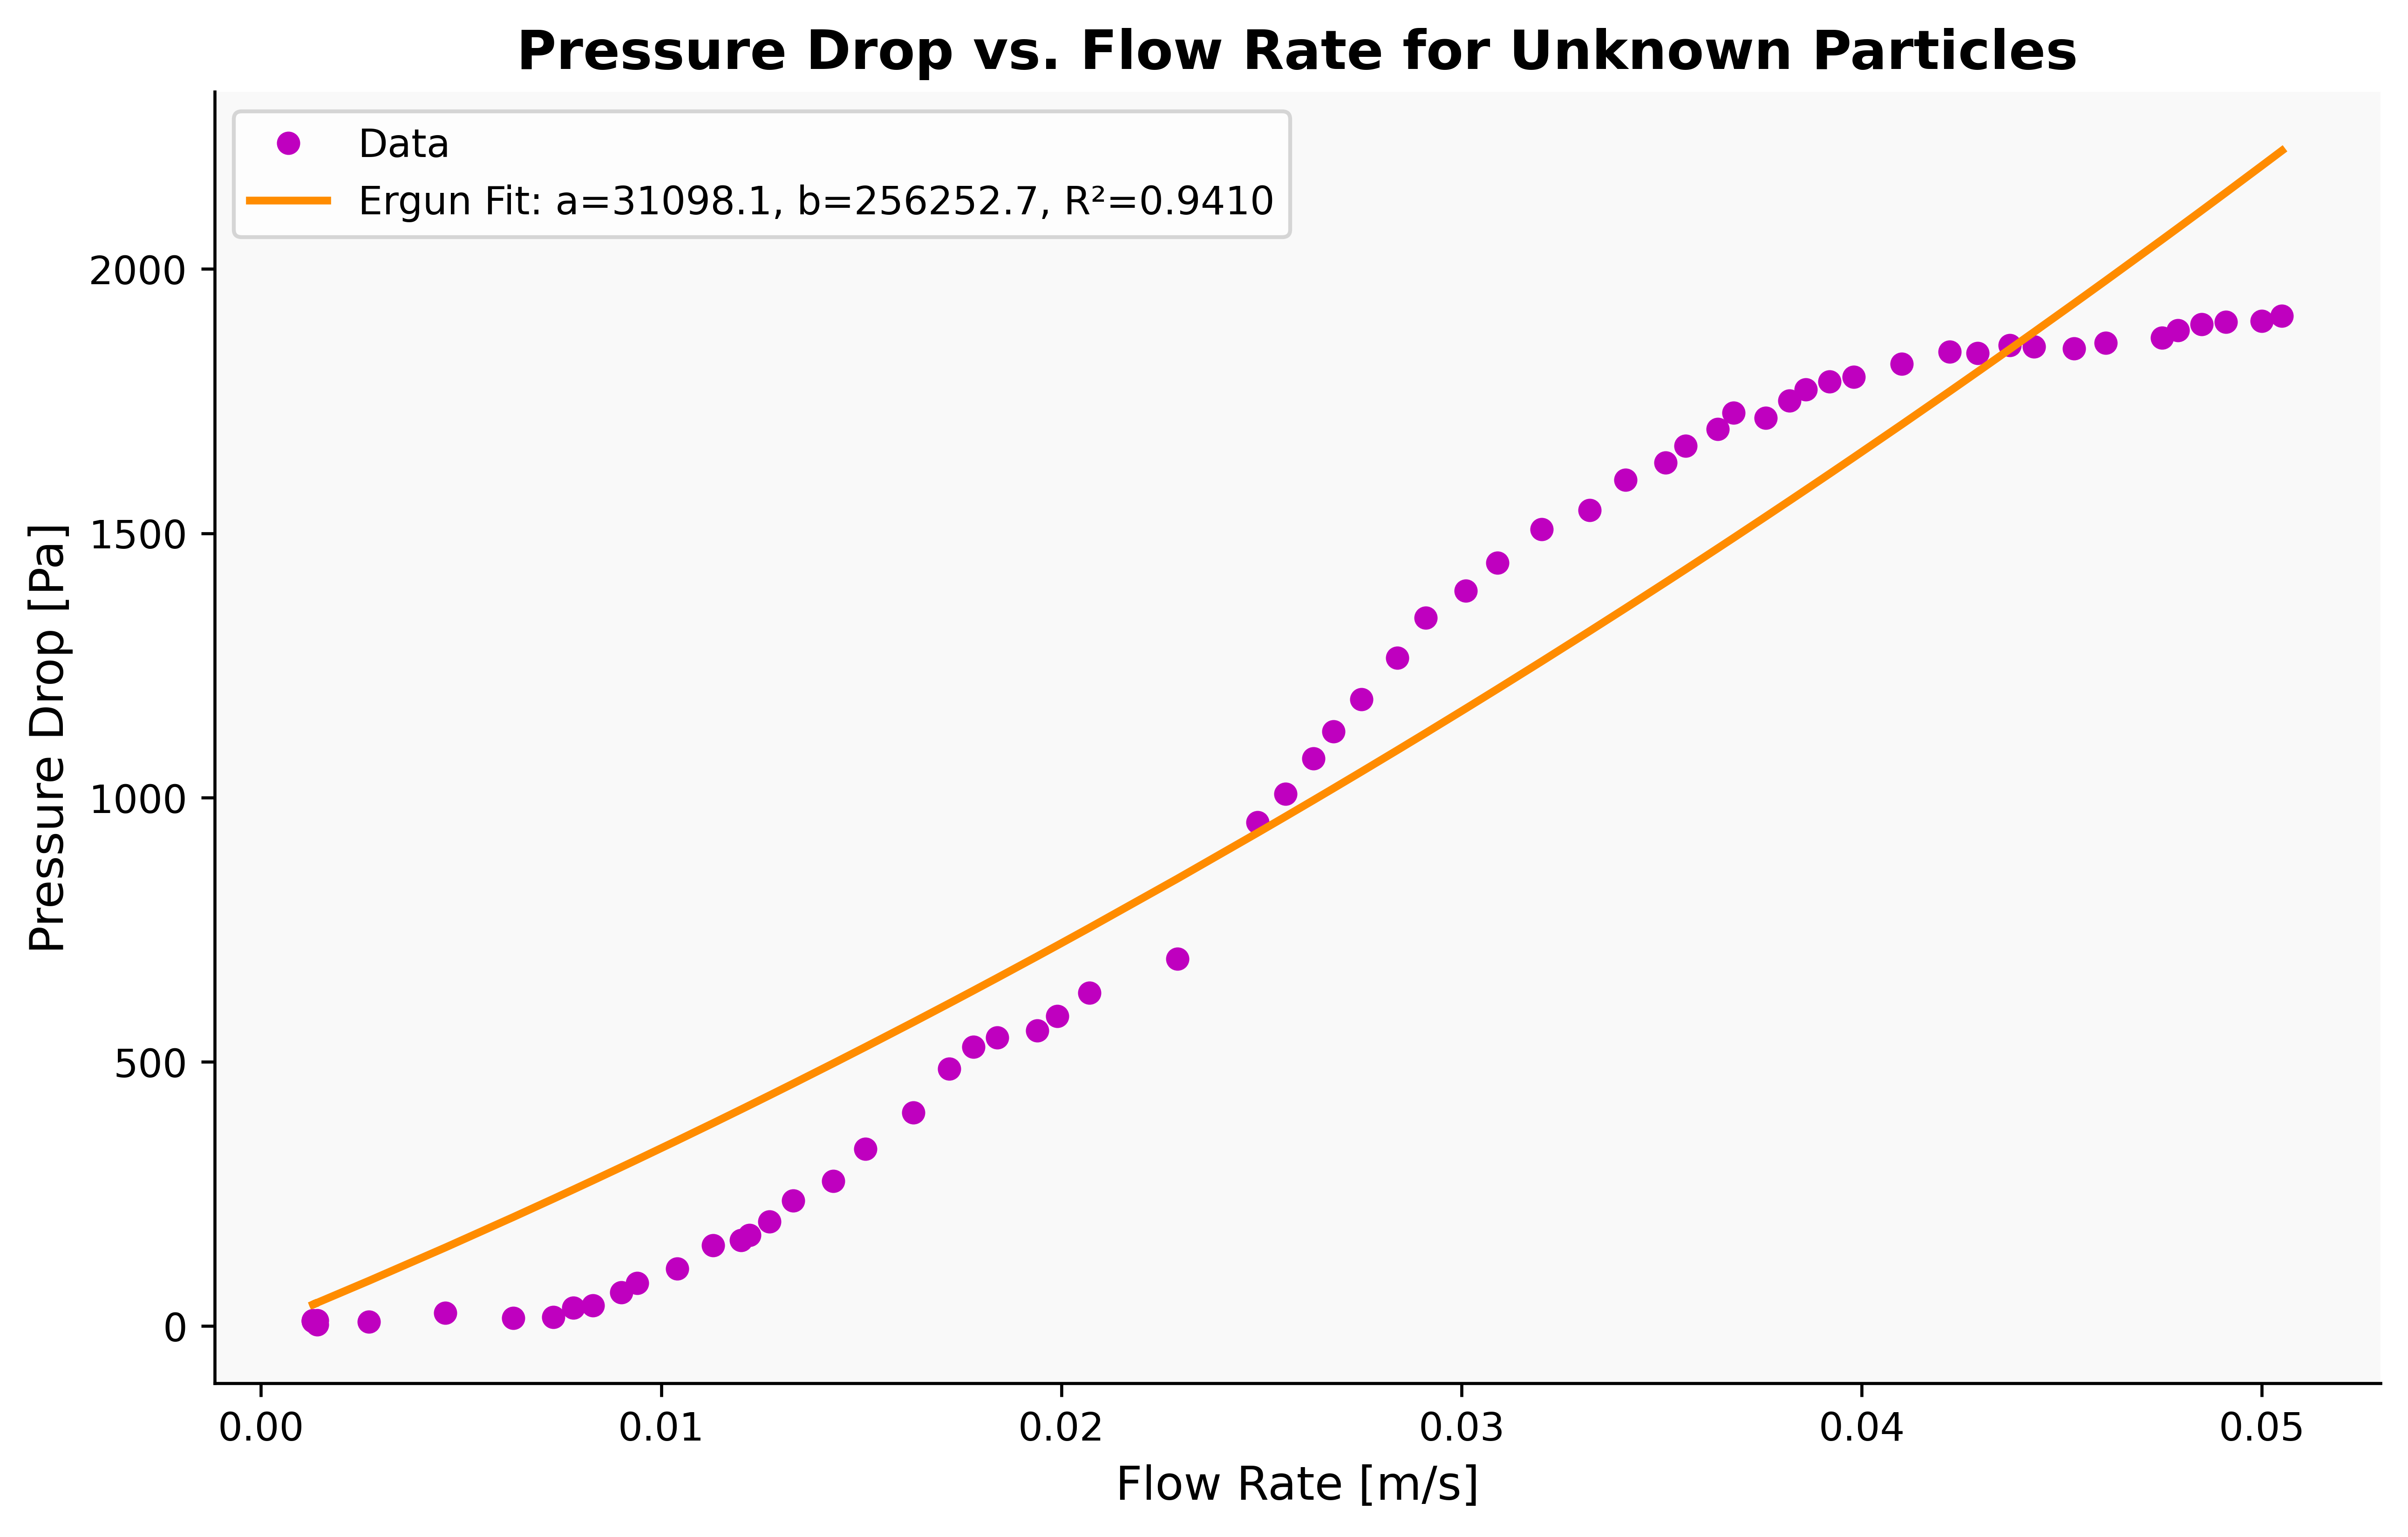

Plot saved successfully at: /Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Graphs/Fitting_Unknown Particles.png


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

# File paths
file_path = "/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Data.xlsx"
save_folder = "/Users/ludovica/Documents/Bachelor/BA6/TP GC/TP 4/Graphs"
sheet_name = "unknown"
label = "Unknown Particles"

# Ensure save folder exists
os.makedirs(save_folder, exist_ok=True)

# Constants
mu = 0.00089  # Fluid viscosity (Pa·s) 
rho = 997  # Fluid density (kg/m³) 
L = 0.195  # Packed bed height (m)

# Two different porosity values
epsilon_1 = 0.391 
epsilon_2 = 0.446  

# Fitting Ergun equation function
def ergun_eq(flow_rate, a, b):
    return a * flow_rate + b * flow_rate**2

# Read the data
df = pd.read_excel(file_path, sheet_name=sheet_name)
flow_rate = df.iloc[:, 0]  # First column (Flow Rate)
pressure_loss = df.iloc[:, 1]  # Second column (Pressure Loss)

# Fit Ergun's equation
popt, _ = curve_fit(ergun_eq, flow_rate, pressure_loss)
a_fit, b_fit = popt

# Function to calculate particle diameter for a given epsilon
def calculate_dp(epsilon):
    dp_1 = np.sqrt((150 * (1 - epsilon) ** 2 * mu * L) / (epsilon ** 3 * a_fit))  # From viscous term
    dp_2 = (1.75 * (1 - epsilon) * rho * L) / (epsilon ** 3 * b_fit)  # From inertial term
    return dp_1, dp_2

# Calculate dp for both porosity values
dp_1_eps1, dp_2_eps1 = calculate_dp(epsilon_1)
dp_1_eps2, dp_2_eps2 = calculate_dp(epsilon_2)

# Calculate R-squared value
fitted_pressure_loss = ergun_eq(flow_rate, *popt)
residuals = pressure_loss - fitted_pressure_loss
ss_res = np.sum(residuals**2)
ss_tot = np.sum((pressure_loss - np.mean(pressure_loss))**2)
r_squared = 1 - (ss_res / ss_tot)

# Print the calculated particle diameters for both porosities
print(f"Porosity ε 1 = {epsilon_1}:")
print(f"  Particle diameter from viscous term (dp_1): {dp_1_eps1:.6f} m")
print(f"  Particle diameter from inertial term (dp_2): {dp_2_eps1:.6f} m\n")

print(f"Porosity ε 2 = {epsilon_2}:")
print(f"  Particle diameter from viscous term (dp_1): {dp_1_eps2:.6f} m")
print(f"  Particle diameter from inertial term (dp_2): {dp_2_eps2:.6f} m\n")

# Create a plot
plt.figure(figsize=(10, 6), dpi=600)  # High-quality image
plt.plot(flow_rate, pressure_loss, 'o', color='m', markersize=5, label="Data")
plt.plot(flow_rate, fitted_pressure_loss, '-', color='darkorange', linewidth=2, 
         label=f"Ergun Fit: a={a_fit:.1f}, b={b_fit:.1f}, R²={r_squared:.4f}")

# Labels and title
plt.xlabel("Flow Rate [m/s]", fontsize=12)
plt.ylabel("Pressure Drop [Pa]", fontsize=12)
plt.title(f"Pressure Drop vs. Flow Rate for {label}", fontsize=14, weight='bold')

# Customize grid and styling
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().set_facecolor('#f9f9f9')  # Subtle background color
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
plt.legend(fontsize=10)
plt.grid(False)

# Save the figure
save_path = os.path.join(save_folder, f"Fitting_{label}.png")
plt.savefig(save_path, format='png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved successfully at: {save_path}")
